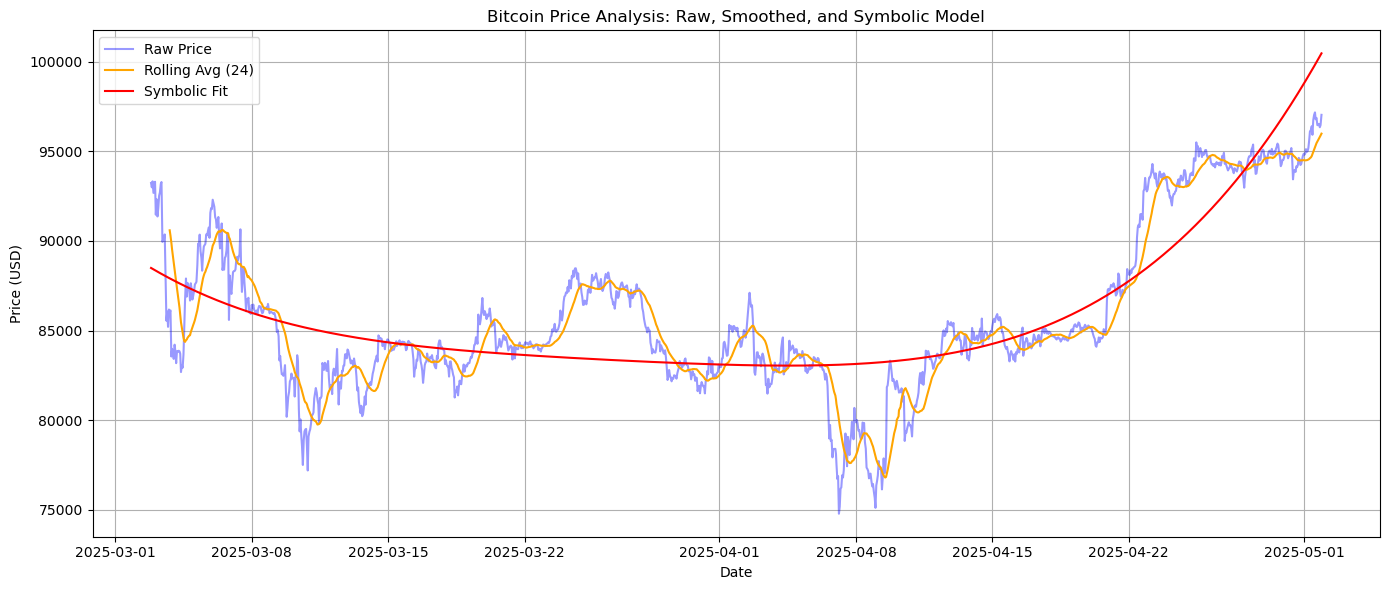

<Figure size 640x480 with 0 Axes>

In [10]:
# Final visualization: raw price, rolling average, and symbolic fit
from builtins import int, float
from sage.all import *
import pandas as pd
import matplotlib.pyplot as plt

# --- Load and prepare data ---
df = pd.read_csv('../data/bitcoin_cleaned.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['price_usd'] = df['price_usd'].apply(float)
df = df.sort_values(by='timestamp')
df['days'] = (df['timestamp'] - df['timestamp'].min()).dt.total_seconds() / (24 * 3600)
df.set_index('timestamp', inplace=True)
df['rolling_avg'] = df['price_usd'].rolling(window=int(24)).mean()

# --- Symbolic polynomial fit ---
x, a0, a1, a2, a3, a4 = var('x a0 a1 a2 a3 a4')
model = a0 + a1*x + a2*x^2 + a3*x^3 + a4*x^4

# Sample every 10th point for fitting
sampled_points = [(float(df['days'].iloc[i]), float(df['price_usd'].iloc[i])) for i in range(0, len(df), 10)]

params = find_fit(sampled_points, model, variables=[x], parameters=[a0, a1, a2, a3, a4])
fitted = model.subs(params)

# Evaluate fitted model over time range
fitted_vals = [float(fitted(x=t)) for t in df['days']]

# --- Final combined plot ---
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['price_usd'], alpha=0.4, label='Raw Price', color='blue')
plt.plot(df.index, df['rolling_avg'], label='Rolling Avg (24)', color='orange')
plt.plot(df.index, fitted_vals, label='Symbolic Fit', color='red')
plt.title('Bitcoin Price Analysis: Raw, Smoothed, and Symbolic Model')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig('../reports/final_plot.png', dpi=300, bbox_inches='tight')

📋 Final Bitcoin Price Analysis (Degree-4 Symbolic Model)

🗓 Period Covered:

March 1, 2025 – May 1, 2025

🔍 Key Observations:

Early March (Mar 1–10):
High volatility with sharp dips from ~$91,000 to ~$80,000.
The symbolic model captures the downward trend but smooths over short-term noise.

Mid March to Early April (Mar 11–Apr 10):
Price enters a sideways consolidation phase, oscillating between ~$80,000–$85,000.
The rolling average follows the actual data closely, while the symbolic curve gently curves downward then begins to rise — suggesting a transition.

April 11–25:
A clear uptrend begins, with price climbing from ~$82,000 to ~$95,000+.
The symbolic model captures this upward acceleration sharply, especially in the second half of April.

April 26–May 1:
Price continues upward, nearing $98,000. The degree-4 polynomial predicts strong acceleration, evident in the steep curve — though it may slightly overshoot real data by the end.

🧠 Model Interpretation:

The degree-4 polynomial allows the model to curve both downward and upward smoothly, fitting both the decline and recovery phases.

The symbolic function’s second derivative (not shown) would indicate a strong positive curvature post-April 10 — consistent with market breakout behavior.

While it doesn’t capture local volatility, it models the overall macro trend with impressive clarity.

